In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew #for some statistics
import statsmodels.api as sm
import statsmodels
from statsmodels.regression import linear_model

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.learning_curve import learning_curve

#import metrics libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [77]:
df= pd.read_csv("spam.data.txt", header=None, sep=" ")
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [78]:
len(df)

4601

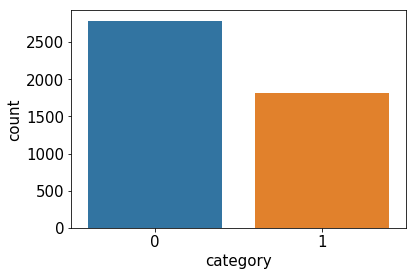

In [79]:
fig, ax = plt.subplots()
category_count = pd.DataFrame()
category_count['count'] = df.iloc[:,-1].value_counts()
sns.barplot(x = category_count.index, y = category_count['count'], ax = ax)
ax.set_ylabel('count', fontsize = 15)
ax.set_xlabel('category',fontsize = 15)
ax.tick_params(labelsize=15)

In [80]:
df = shuffle(df)

train, test = train_test_split(df, test_size=0.3)

In [81]:
Y_train=train.iloc[:,-1]
Y_train.shape

(3220,)

In [82]:
Y_test=test.iloc[:,-1]
Y_test.shape

(1381,)

In [83]:
X_train=train.drop(train.columns[len(train.columns)-1], axis=1)
X_train.shape

(3220, 57)

In [84]:
X_test=test.drop(test.columns[len(test.columns)-1], axis=1)
X_test.shape

(1381, 57)

In [85]:

#function which takes in y test value and y predicted value and prints the associated model performance metrics
def model_assessment(y_test,predicted_class):
    print('confusion matrix')
    print(confusion_matrix(y_test,predicted_class))
    print('accuracy')
    print(accuracy_score(y_test,predicted_class))
    print('precision')
    print(precision_score(y_test,predicted_class))
    print('recall')
    print(recall_score(y_test,predicted_class))
    print('f-Score')
    print(f1_score(y_test,predicted_class))
    print('AUC')
    print(roc_auc_score(np.where(y_test==0,1,0),np.where(predicted_class==0,1,0)))
    plt.matshow(confusion_matrix(y_test, predicted_class), cmap=plt.cm.binary, interpolation='nearest')
    plt.title('confusion matrix')
    plt.colorbar()
    plt.ylabel('expected label')
    plt.xlabel('predicted label')

### Decision-Tree

In [86]:
#create and fit tree model
model_tree=DecisionTreeClassifier()
model_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

confusion matrix
[[761  65]
 [ 56 499]]
accuracy
0.912382331644
precision
0.88475177305
recall
0.899099099099
f-Score
0.891867739053
AUC
0.910203302576


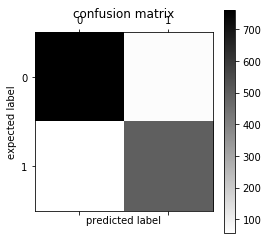

In [87]:
#run model on test and print metrics
predicted_class_tree=model_tree.predict(X_test)
model_assessment(Y_test,predicted_class_tree)

### Random Forest

In [88]:
#create and fit model
model_rf=RandomForestClassifier(n_estimators=20,criterion='entropy')
model_rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

confusion matrix
[[802  24]
 [ 40 515]]
accuracy
0.953656770456
precision
0.95547309833
recall
0.927927927928
f-Score
0.941499085923
AUC
0.949436118928


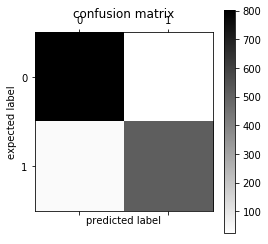

In [89]:
#run model on test and print metrics
predicted_class_rf=model_rf.predict(X_test)
model_assessment(Y_test,predicted_class_rf)

#### n_estimators=100

confusion matrix
[[802  24]
 [ 39 516]]
accuracy
0.954380883418
precision
0.955555555556
recall
0.92972972973
f-Score
0.942465753425
AUC
0.950337019829


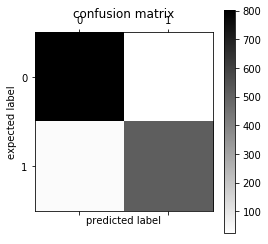

In [90]:
#create and fit model
model_rf=RandomForestClassifier(n_estimators=100,criterion='entropy')
model_rf.fit(X_train,Y_train)
#run model on test and print metrics
predicted_class_rf=model_rf.predict(X_test)
model_assessment(Y_test,predicted_class_rf)

confusion matrix
[[797  29]
 [ 35 520]]
accuracy
0.953656770456
precision
0.947176684882
recall
0.936936936937
f-Score
0.942028985507
AUC
0.95091398905


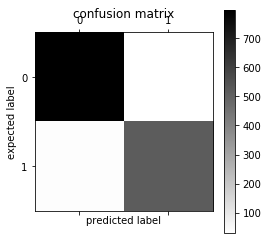

In [92]:
GBoost = GradientBoostingClassifier( n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   random_state =5)
GBoost.fit(X_train,Y_train)
predicted_class_GB=GBoost.predict(X_test)
model_assessment(Y_test,predicted_class_GB)